what eventually worked with installing tensorflow:

conda create -n tf_env python=3.10
conda activate tf_env
conda install -c conda-forge tensorflow matplotlib scikit-learn

the environment is in ~/anaconda3/envs/tf_env

sheesh! took a week of #train-time to get this shit to work

In [3]:
#@title Classification Example (MNIST Digits)
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from time import time
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 2s 0us/step


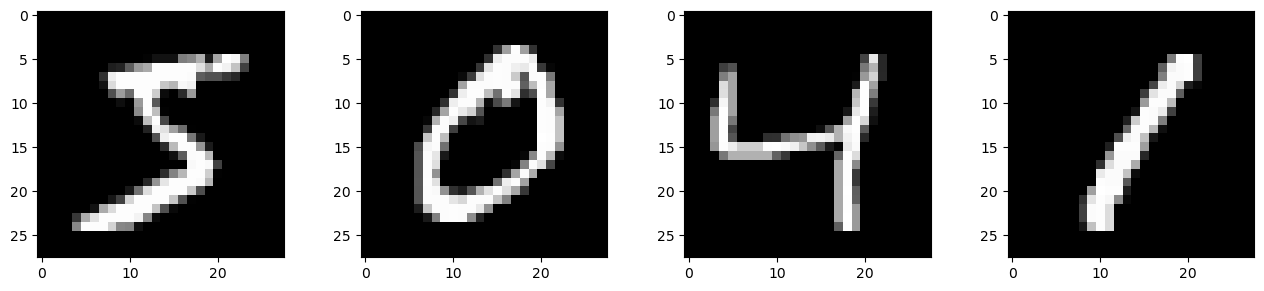

In [4]:


# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Check the images
fig = plt.figure(figsize=plt.figaspect(0.2))

ax = fig.add_subplot(1, 4, 1)
plt.imshow(X_train[0], cmap='gray')

ax = fig.add_subplot(1, 4, 2)
plt.imshow(X_train[1], cmap='gray')

ax = fig.add_subplot(1, 4, 3)
plt.imshow(X_train[2], cmap='gray')

ax = fig.add_subplot(1, 4, 4)
plt.imshow(X_train[3], cmap='gray')




In [ ]:

# Normalize (scale 0-255 pixel values to 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten images (28x28 → 784)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)



# Build model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

batch_size=32
# there are 60,000 samples (rows)
# that means there will be 1,875 updates of 32 batches

# batch size of 16 results in accuracy of 0.915 and runtime of 51 seconds
# batch size of 32 results in accuracy of 0.972 and runtime of 30 seconds
# 64 results in accuracy of 0.972 and runtime of 27 seconds
# 128 results in accuracy of 0.965 and runtime of 12 seconds

start = time()
# Train
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test))

training_duration = time()-start

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print("Training finished in :", training_duration, " seconds")

# Task 1: Exploring the Effect of Batch Size

Update your previous code to investigate how different values of the training parameter batch_size affect model accuracy, loss, and execution time.

- Test several batch sizes: 8, 16, 32, 64, 128.
- Visualize your results using appropriate plots (e.g., line charts) to compare the outcomes across different batch sizes.
- Briefly discuss your observations — how does the batch size influence performance and efficiency?

# Task 2: Exploring the Effect of Learning Rate

Modify your code to test different `learning_rate` values (0.001, 0.01, 0.1, 0.5).
Compare their impact on accuracy, loss, and training stability.
Visualize the results with plots and summarize your observations.

**Note:** There is a trade-off between learning rate and batch size, such that a higher batch size allows for the use of a larger learning rate.

# Task 3: Exploring the Effect of the Optimizer
Use the following four optimizers presented in class (SGD, RMSprop, Adam, Adagrad) to train four neural networks (identical aside from the optimizer used). How well does the networks perform on the test set? Rank the optimizers.

# Task 4: Final Model Training

Train your model using the best combination of parameters you identified — including number of epochs, learning rate, optimizer, and batch size.
Report the final accuracy and loss, and visualize the training and validation curves.